## Día 3.1
Referencias :
1.[TEQS](https://github.com/The-Eigensolvers/TEQS)
2.[Qiskit textbook](https://qiskit.org/textbook/ch-states/representing-qubit-states.html)

In [1]:
import numpy as np
from qiskit import QuantumCircuit

from sympy import Matrix

# Función para visualizar matrices
def view(M,name=''):
    display(name,Matrix(M))

### Producto de Kronecker

In [5]:
Zero = np.array([1,0]) 
One = np.array([0,1]) 

# np.kron efectua el producto de Kronecker

ZeroZero = np.kron(Zero,Zero) 
view(ZeroZero,"|00>")

ZeroOne = np.kron(Zero,One)
view(ZeroOne,"|01>")

'|00>'

Matrix([
[1],
[0],
[0],
[0]])

'|01>'

Matrix([
[0],
[1],
[0],
[0]])

Mostraremos que es igual $ (X|q_0\rangle) \otimes (Z|q_1\rangle)$ que $(X \otimes Z)(|q_0\rangle \otimes |q_0\rangle)$

In [6]:
X = np.array([[0,1],[1,0]]) # Actúa en el primer qubit 
Z = np.array([[1,0],[0,-1]]) # Actúa en el segundo qubit

XZeroZOne = np.kron(X@Zero,Z@One) 
view(XZeroZOne,"X|0>Z|1> = -|11>")

XZ = np.kron(X,Z) # Operador total XZ
view(XZ,"XZ")

XZZeroOne = XZ@ZeroOne
view(XZZeroOne,"XZ|01>")

'X|0>Z|1> = -|11>'

Matrix([
[ 0],
[ 0],
[ 0],
[-1]])

'XZ'

Matrix([
[0,  0, 1,  0],
[0,  0, 0, -1],
[1,  0, 0,  0],
[0, -1, 0,  0]])

'XZ|01>'

Matrix([
[ 0],
[ 0],
[ 0],
[-1]])

### Simulando vector de estado

In [2]:
from qiskit import Aer,execute 

Aer.backends() # Son quienes corren los circuitos, ya sean simuladores o computadores reales

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

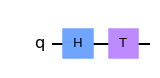

In [3]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)

qc.draw('mpl')

In [4]:
simulador_vector_estado = Aer.get_backend('statevector_simulator')
job = execute(qc,backend=simulador_vector_estado)
result = job.result()
vector_estado = result.get_statevector()

In [5]:
vector_estado

array([0.70710678+0.j , 0.5       +0.5j])

### Visualización - Esfera de Bloch

In [18]:
from qiskit.visualization import plot_bloch_multivector


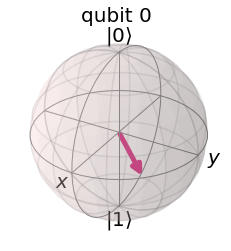

In [20]:
plot_bloch_multivector(vector_estado)

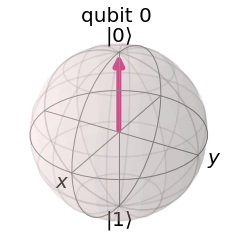

In [23]:
# Confirmemos que los qubits se inicializan automáticamente en |0> y que H|0> = |+>
qc_0 = QuantumCircuit(1)
vector_0 = execute(qc_0,backend=simulador_vector_estado).result().get_statevector()

qc_1 = QuantumCircuit(1)
qc_1.h(0)
vector_1 = execute(qc_1,backend=simulador_vector_estado).result().get_statevector()

plot_bloch_multivector(vector_0)

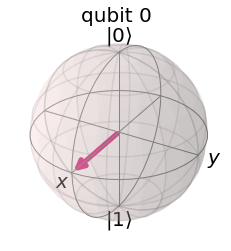

In [24]:
plot_bloch_multivector(vector_1)

### Simulando matriz unitaria

In [25]:
simulador_matriz_unitaria = Aer.get_backend('unitary_simulator')

'qc_0'

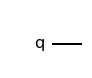

'qc_1'

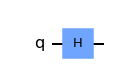

U_0:
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
U_1:
 [[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]


In [32]:
qc_0 = QuantumCircuit(1) 

qc_1 = QuantumCircuit(1)
qc_1.h(0)

display("qc_0",qc_0.draw('mpl')) # print para circuitos 
display("qc_1",qc_1.draw('mpl')) # print para circuitos 

unitary_0 = execute(qc_0,backend=simulador_matriz_unitaria).result().get_unitary()
print("U_0:\n",unitary_0)

unitary_1 = execute(qc_1,backend=simulador_matriz_unitaria).result().get_unitary()
print("U_1:\n",unitary_1)

### Simulando experimento (Conteo)

In [6]:
from qiskit.visualization import plot_histogram

In [7]:
simulador_exp = Aer.get_backend('aer_simulator') # Libre de ruido

'qc_0'

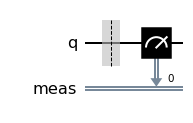

'qc_1'

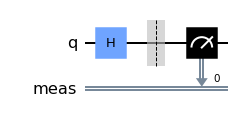

In [8]:
qc_0 = QuantumCircuit(1)
qc_0.measure_all()

qc_1 = QuantumCircuit(1)
qc_1.h(0)
qc_1.measure_all()

display("qc_0",qc_0.draw('mpl'))
display("qc_1",qc_1.draw('mpl'))

cuentas_0 = execute(qc_0,backend=simulador_exp,shots=1024).result().get_counts()
cuentas_1 = execute(qc_1,backend=simulador_exp,shots=1024).result().get_counts()

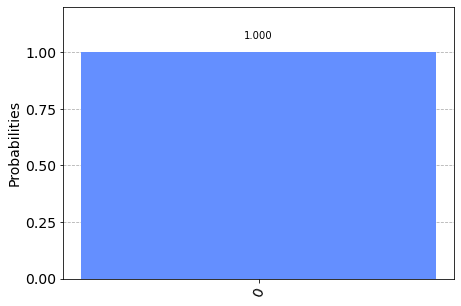

In [9]:
plot_histogram(cuentas_0)

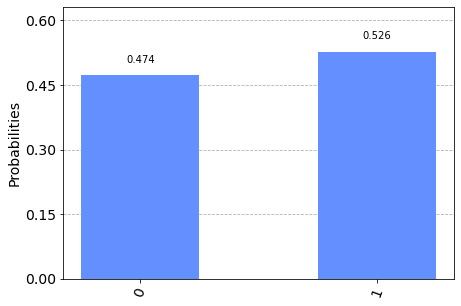

In [40]:
plot_histogram(cuentas_1)